# Homework 12: Natural Language Processing

## Aliza Rafique (ar05986)

#### ar05986@st.habib.edu.pk

## Necessary Imports

In [204]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
from tika import parser
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aliza Rafique\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Aliza
[nltk_data]     Rafique\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Question 1: Name Entity Relation (NER) Analysis

#### For this question, I have chosen an article from Quanta Magazine. (I have used the pdf version for some parts and link for other parts).

### PDF Parser

In [47]:
raw = parser.from_file('quanta_physics.pdf')

#### There are a lot of empty spaces in the beginning that I am going to remove.

In [49]:
raw['content'] = raw['content'].strip("\n")

### Using the SpaCy Library

In [50]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(raw['content'])
print([(X.text, X.label_) for X in doc.ents])

[('4/17/22', 'CARDINAL'), ('12:48 AM', 'TIME'), ('1/9', 'CARDINAL'), ('April 7', 'DATE'), ('5', 'CARDINAL'), ('4/17/22', 'CARDINAL'), ('12:48 AM', 'TIME'), ('2/9', 'CARDINAL'), ('one', 'CARDINAL'), ('17', 'CARDINAL'), ('Samuel Velasco/', 'PERSON'), ('4/17/22', 'CARDINAL'), ('12:48 AM', 'TIME'), ('3/9', 'CARDINAL'), ('0.1%', 'PERCENT'), ('today', 'DATE'), ('Science', 'WORK_OF_ART'), ('the Fermi National Accelerator Laboratory', 'ORG'), ('Batavia', 'GPE'), ('Illinois', 'GPE'), ('a decade ago', 'DATE'), ('roughly 400', 'CARDINAL'), ('the Collider Detector', 'ORG'), ('Fermilab', 'ORG'), ('CDF', 'ORG'), ('Tevatron', 'ORG'), ('quantum physics', 'ORG'), ('half a century', 'DATE'), ('2012', 'DATE'), ('Sven Heinemeyer', 'PERSON'), ('the Institute for\n\nTheoretical Physics', 'ORG'), ('Madrid', 'GPE'), ('CDF', 'ORG'), ('Higgs', 'PERSON'), ('CDF', 'ORG'), ('hundreds', 'CARDINAL'), ('Aida El-Khadra', 'PERSON'), ('the University of Illinois, Urbana-Champaign', 'ORG'), ('W', 'LOC'), ('2017', 'DATE')

### Explanation

Here through SpaCy library has labelled the words. For example, for all the numbers the label is "Cardinal". It has also cleverly recognized phrases such as "half a century" as "Date" which of course makes sense. Morever, what I found interesting is that it labelled "Higgs" as a person which is somehow correct because Peter Higgs was a person but here in the article by "Higgs" they mean the particle "Higgs Boson" and not the person, that I think the library was unable to identify otherwise it would have probably labelled it something else (strangely there is no label of objects). Moreover, most of the times the library correctly identified the organizations (except for identifying agree, W as organization. Strangely, it identified "Science" as a "work of art" which doesn't make any sense but also spacy library doesn't really have entity of "disciplines". SpaCy lacks a bit in identification as we saw that for some websites it labelled as product, some as person or organization. This lacking maybe is due to the few entities that we can identify through SpaCy. 

##### Miscellanous
Checking for what SpaCy returns with list of objects

In [12]:
temp_nlp = spacy.load('en_core_web_sm')
temp_doc = temp_nlp('I am Aliza, I am sitting on a chair and writing on a white board. I like to eat pasta and I am doing my homework. Till homework sentence, the nlp output was nothing, lets see if it gives any output now.')
print([(X.text, X.label_) for X in temp_doc.ents])

# Strangely it did not give any output.

[]


###### IOB SCHEME
###### I – Token is inside an entity.
###### O – Token is outside an entity.
###### B – Token is the beginning of an entity.

In [15]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc][:100])

[(4/17/22, 'B', 'CARDINAL'), (,, 'O', ''), (12:48, 'B', 'TIME'), (AM, 'I', 'TIME'), (Fermilab, 'O', ''), (Says, 'O', ''), (Particle, 'O', ''), (Is, 'O', ''), (Heavy, 'O', ''), (Enough, 'O', ''), (to, 'O', ''), (Break, 'O', ''), (the, 'O', ''), (Standard, 'O', ''), (Model, 'O', ''), (|, 'O', ''), (Quanta, 'O', ''), (Magazine, 'O', ''), (

, 'O', ''), (https://www.quantamagazine.org/fermilab-says-particle-is-heavy-enough-to-break-the-standard-model-20220407/, 'O', ''), (1/9, 'B', 'CARDINAL'), (

, 'O', ''), (Newly, 'O', ''), (Measured, 'O', ''), (Particle, 'O', ''), (Seems, 'O', ''), (Heavy, 'O', ''), (Enough, 'O', ''), (to, 'O', ''), (Break, 'O', ''), (Known, 'O', ''), (Physics, 'O', ''), (

, 'O', ''), (P, 'O', ''), (A, 'O', ''), (R, 'O', ''), (T, 'O', ''), (I, 'O', ''), (C, 'O', ''), (L, 'O', ''), (E, 'O', ''), ( , 'O', ''), (P, 'O', ''), (H, 'O', ''), (Y, 'O', ''), (S, 'O', ''), (I, 'O', ''), (C, 'O', ''), (S, 'O', ''), (

, 'O', ''), (By, 'O', ''), (C, 'O', ''), (H, 'O', ''), (A, 'O

### Explanation

Since the article is very very long, I have printed the output of 100 elements (but I have checked the complete output myself). Here, we can see that it has tokenized letters as well and marked outside of entity which makes sense. Moreover, it has also considered tokens inside the entity like time and cardinal. But we can see that for most of them it is outside the entity. As I already stated above that the entities that SpaCy can recognize are limited. [https://towardsdatascience.com/custom-named-entity-recognition-using-spacy-7140ebbb3718#:~:text=SpaCy%20NER%20already%20supports%20the,%2C%20agencies%2C%20institutions%2C%20etc.]


In [42]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [43]:
ny_bb = url_to_string("https://www.quantamagazine.org/fermilab-says-particle-is-heavy-enough-to-break-the-standard-model-20220407/")
article = nlp(ny_bb)
len(article.ents)

131

In [19]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 22,
         'DATE': 22,
         'CARDINAL': 19,
         'ORG': 47,
         'PERCENT': 1,
         'WORK_OF_ART': 2,
         'GPE': 6,
         'ORDINAL': 2,
         'LOC': 7,
         'QUANTITY': 1,
         'TIME': 1,
         'LANGUAGE': 1})

In [20]:
labels2 = [x.label_ for x in doc.ents]
Counter(labels2)

Counter({'CARDINAL': 35,
         'TIME': 9,
         'DATE': 20,
         'PERSON': 16,
         'PERCENT': 1,
         'WORK_OF_ART': 3,
         'ORG': 36,
         'GPE': 4,
         'LOC': 7,
         'PRODUCT': 1,
         'QUANTITY': 1,
         'ORDINAL': 1})

### Explanation

The number of labels found using the link of the article are different than the labels found in the pdf. That does make sense because if we open the pdf version, we have time and date of publication and more details than the website. But in anyway, we can see the prominent entitities like Person, Cardinal, and organization. These entities are prominent and it makes sense because this is a scientific paper that talks about scientists involved, their organization where they work and performed the experiments, and it also shares the numbers for the experiment results. 

##### Will use article version for the rest of the question

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


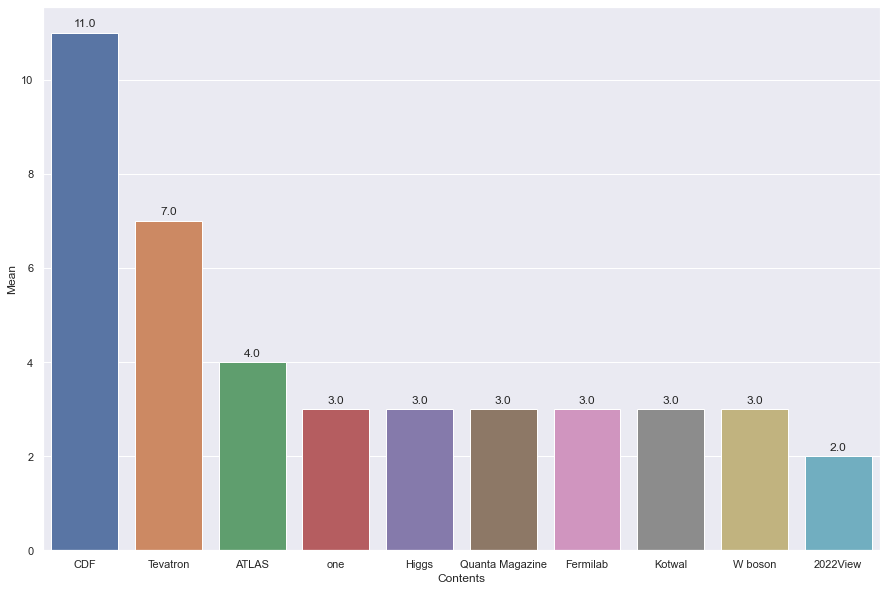

In [28]:
items = [x.text for x in article.ents]
output = Counter(items).most_common(10)
x = [i[0] for i in output]
y = [i[1] for i in output]
# PLOTTING
ax = sns.barplot(x, y)
ax.set(xlabel='Contents', ylabel='Mean')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

### Explanation

Here, I have printed out top 10 most common items. The top one is CDF which is abbreviation of "Collider Detector at Fermilab" where the experiment was performed and therefore, of course it is discussed the most. The next is "Tevatron" which is also a particle collider. 

In [32]:
sentences = [x for x in article.sents]
print(sentences[10])

“This would be a complete change in how we see the world,” potentially even rivaling the 2012 discovery of the Higgs boson in significance, said Sven Heinemeyer, a physicist at the Institute for Theoretical Physics in Madrid who is not part of CDF.


In [34]:
displacy.render(nlp(str(sentences[10])), jupyter=True, style='ent')

### Explanation

Here, we can see how SpaCy has found the entities as before. 

In [38]:
dict([(str(x), x.label_) for x in nlp(str(sentences[10])).ents])

{'2012': 'DATE',
 'Sven Heinemeyer': 'PERSON',
 'the Institute for Theoretical Physics': 'ORG',
 'Madrid': 'GPE',
 'CDF': 'ORG'}

### Explanation

Another way of showing the entities. 

### Lemmaization

In [40]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('2017', 'NUM', '2017'),
 ('instance', 'NOUN', 'instance'),
 ('ATLAS', 'PROPN', 'ATLAS'),
 ('experiment', 'NOUN', 'experiment'),
 ('Europe', 'PROPN', 'Europe'),
 ('Large', 'ADJ', 'large'),
 ('Hadron', 'PROPN', 'Hadron'),
 ('Collider', 'PROPN', 'Collider'),
 ('measured', 'VERB', 'measure'),
 ('W', 'PROPN', 'W'),
 ('particle', 'NOUN', 'particle'),
 ('mass', 'NOUN', 'mass'),
 ('found', 'VERB', 'find'),
 ('hair', 'NOUN', 'hair'),
 ('heavier', 'ADJ', 'heavy'),
 ('Standard', 'PROPN', 'Standard'),
 ('Model', 'PROPN', 'Model'),
 ('says', 'VERB', 'say')]

### Explanation

Here some of the words categories are correction for example nouns and verbs. But for expecially pronoun, it has not be correctly identified. 

In [41]:
displacy.render(nlp(str(sentences)[500:5000]), jupyter=True, style='ent')

### Explanation

This is smilar to what we did above. For this since the article is long, I have picked the string from 500th index to 5000th index for the output. Here, we can see the prominent entities for this particular range.

## Question 2: Word frequency and Keyword Extraction Analysis

The research paper that I am analyzing is from IEEE and this link [https://ieeexplore.ieee.org/abstract/document/9064519].

### PDF Parser

In [51]:
raw = parser.from_file('2020.2987324.pdf')

### Word Frequency

#### Using NLTK

In [53]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [54]:
filtered_word_freq.most_common(20)

[('data', 262),
 ('vol', 154),
 ('model', 130),
 ('models', 128),
 ('CPS', 114),
 ('systems', 103),
 ('learning', 102),
 ('system', 101),
 ('hybrid', 99),
 ('modeling', 95),
 ('ML', 84),
 ('used', 70),
 ('Proc', 68),
 ('K.', 60),
 ('IEEE', 58),
 ('Physics', 55),
 ('P.', 55),
 ('physics', 54),
 ('MB', 53),
 ('dynamics', 53)]

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


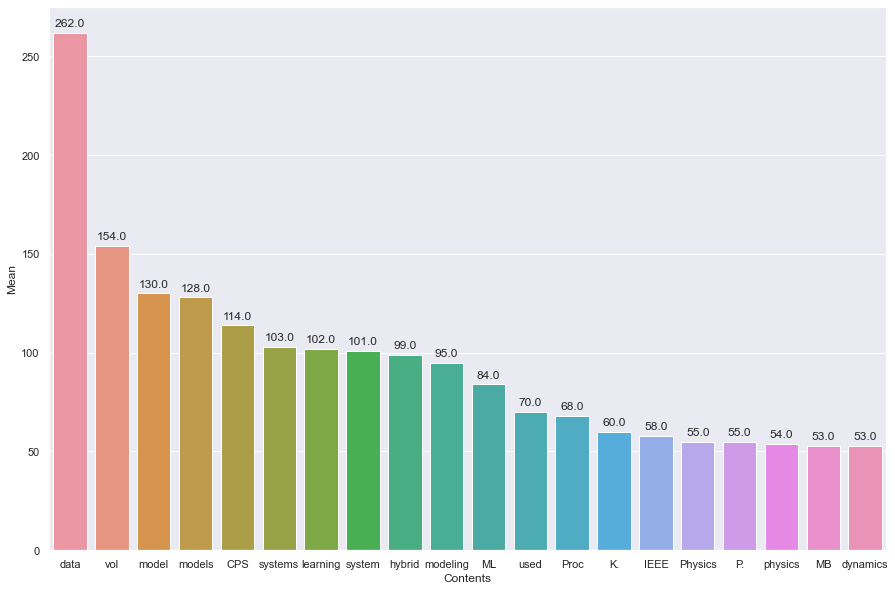

In [57]:
words = filtered_word_freq.most_common(20)
# Visualizing
x = [i[0] for i in words]
y = [i[1] for i in words]
# PLOTTING
ax = sns.barplot(x, y)
ax.set(xlabel='Contents', ylabel='Mean')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

#### Explanation

From this graph, we can see that the top most word that was used throughout the research paper is data then it is "vol" (which when I checked basically refers to volume and has appeared a lot in the references section of the paper) and after that we have model and models and so on. 

#### Using SpaCy

In [70]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(raw['content'])

In [71]:
raw['content'] = raw['content'].strip("\n")

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


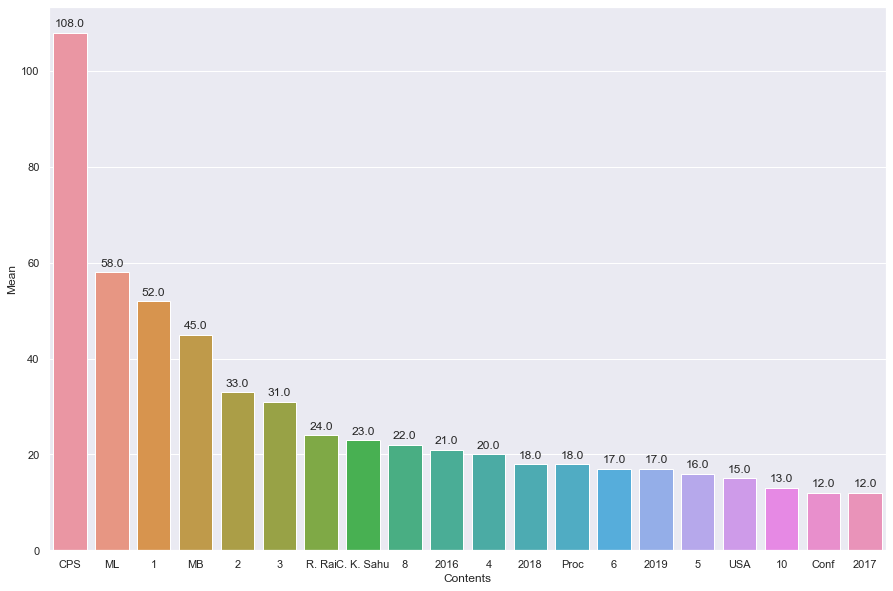

In [72]:
items = [x.text for x in doc.ents]
output = Counter(items).most_common(20)
x = [i[0] for i in output]
y = [i[1] for i in output]
# PLOTTING
ax = sns.barplot(x, y)
ax.set(xlabel='Contents', ylabel='Mean')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

#### Explanation
SpaCy library is giving a very different output than NLTK. For SpaCy, CPS appeared a lot more as compared to all the other words but in NLTK, "CPS" is the 5th most frequent word. Most of the words are very differently identified by both of the libraries. The most frequent word for SpaCy has appeared on average 108 times and the least frequent has appeared 12 times. 

#### Using Collections library

In [75]:
from collections import Counter

In [87]:
wordcount = {}
for word in raw['content'].lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [97]:
# Removing individual letters
alpha = 'abcdefghijklmnopqrstuvwxyz'
new = {}
for i in wordcount:
    if i not in alpha:
        new[i] = wordcount[i]
wordcount = new

In [100]:
count = Counter(wordcount)
most_occur = count.most_common(20)

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


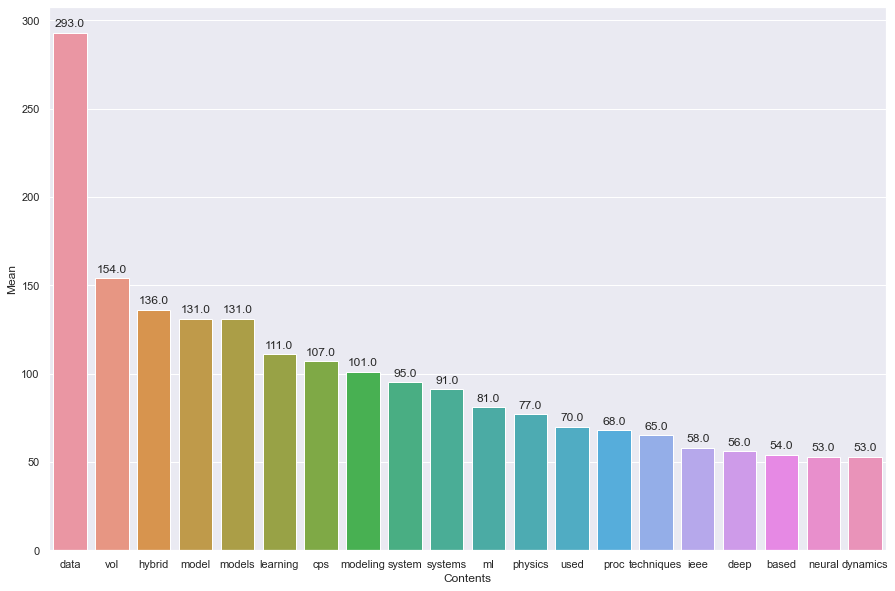

In [101]:
x = [i[0] for i in most_occur]
y = [i[1] for i in most_occur]
# PLOTTING
ax = sns.barplot(x, y)
ax.set(xlabel='Contents', ylabel='Mean')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

#### Explanation
With collections we are simply counting the occurrences of the words. The most frequent word is "data" which is also the most frequent word in NLTK. Most of the other words also match with the results of NLTK as opposed to that of SpaCy. But the results showed by this technique almost accurately shows the count that exists. This technique, shows more counts for the same words as compared to NLTK library.

### Final Word Cloud Visualization

In [104]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

### I am having some issues with WorkCloud imports therefore, I could not include the visualizations. 

### Keyword Extraction

#### Using Rake

In [106]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(60.21035300972146,
  'imbalanced data sets ,’’ acm sigkdd explorations newslett ., vol'),
 (53.561624649859944,
  'reciprocating compressor valves using teager – kaiser energy operator'),
 (46.509987016664645,
  'time series ,’’ handbook brain theory neural netw ., vol'),
 (43.68773946360153,
  'computationally inexpensive delayed error normalized least mean square'),
 (43.59487179487179,
  '‘‘ piecewise affine regression via recursive multiple least squares'),
 (43.06457653567882,
  'annual runoff time series forecasting using elman neural network'),
 (42.24487284657722,
  'assessing average model performance ,’’ climate res ., vol'),
 (41.92717561128037,
  'stable drone landing control using learned dynamics ,’’'),
 (41.71565625671547, 'rolling element bearings ,’’ ieee sensors j ., vol'),
 (40.087679002787894,
  '‘‘ intelligent bearing fault diagnosis method combining compressed data acquisition')]

#### Explanation
Here we can see the most used phrases in this research paper and also how many times did they occur. These phrases can give key insights about the main things being talked about in the whole research paper. For example, the type of datasets used that are referred many times, the type of data as mentioned here is time series and so on. These phrases extracted are not perfect as we can see some of them don't make any sense. 

#### Using Yake

In [108]:
import yake

In [109]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Hybrid Physics Guided', 9.437132285696676e-05)
('Data', 0.00026018965703038135)
('CPS hybrid modeling', 0.00032658280666276253)
('hybrid models', 0.0003421290769177994)
('Hybrid Physics', 0.0004772070747274833)
('CPS', 0.0005191612152334601)
('Hybrid modeling', 0.000673195375069954)
('Physics Guided', 0.0006775808425684895)
('hybrid modeling domain', 0.0006938013123154947)
('model', 0.000710919358919604)
('CPS hybrid model', 0.0007442146365162072)
('hybrid CPS model', 0.0007442146365162072)
('models', 0.0007477818441969168)
('Physics', 0.0008084320856893846)
('deep learning', 0.0008562180686418184)
('Hybrid', 0.0008733500239432829)
('CPS modeling techniques', 0.000901520529601937)
('CPS modeling', 0.0009596998468670329)
('vol.', 0.000975383380795609)
('systems', 0.001013172574246407)


#### Explanation
This output is much better as compared to the output from Rake library. Here we can see that a proper phrases and how many times they are repeated. We can see that CPS Modeling Techqniue is repeated many times as compared to others.

## Question 3: Sentiment Analysis

In [112]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

### Authorization

In [113]:
consumer_key = 'eR1zb853CsroHzovzLiJNPBK8'
consumer_key_secret = 'SMTGv6dLoAj81HAJ1q0I8DQ19pTTscdAINCXynLHdxb6tUDVjA'
access_token = '107436862-6ywCOzDd5bSHLZd3BWJ3buacPsL4OpWmhV5Lu9Uk'
access_token_secret = 'JAfDMXeg0OYz9ax8dELqvSlfX1sduHDVHnslVWwJjiJc2'
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Searching Tweets 

In [256]:
search_term = "#importedgovernmentnamanzoor -filter:retweets"
tweets = api.search_tweets(q=search_term, lang="en", since_id='2022-01-01')

In [257]:
searched_tweets = [t for t in tweets]

### Cleaning and Storing them in CSV file

In [258]:
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_politics_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_politics_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_politics.csv',index=False)

In [259]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

### Sentiment Analysis

In [260]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])
tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [261]:
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_clean_politics.csv',index=False)
tweet_dataset = pd.read_csv('tweet_data_clean_politics.csv')

In [262]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0]>=0:
       res = 'positive'
    else:
       res= 'negative'
    return(res)

In [263]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'])

In [264]:
tweet_dataset.head(20)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1515762621026377741,Run the trend in English instead of Urdu IMPOR...,0,0,Sun Apr 17 18:42:25 +0000 2022,positive
1,1515750601711550464,AzmaBokhariPMLN complete trash you are wait IA...,0,0,Sun Apr 17 17:54:39 +0000 2022,positive
2,1515744767493095425,CMShehbaz Thats mean our Basha Dam money is go...,0,0,Sun Apr 17 17:31:28 +0000 2022,negative
3,1515739213286760450,Nawaz stayed at Avenfield property that he doe...,2,4,Sun Apr 17 17:09:24 +0000 2022,negative
4,1515736418718564358,nadeemiba As Americas policy of making India i...,0,0,Sun Apr 17 16:58:17 +0000 2022,negative
5,1515736293635936257,hina98hina As Americas policy of making India ...,0,0,Sun Apr 17 16:57:48 +0000 2022,negative
6,1515736205320728581,NaziaMemon01 As Americas policy of making Indi...,0,0,Sun Apr 17 16:57:27 +0000 2022,negative
7,1515735482990272513,As Americas policy of making India its number ...,0,0,Sun Apr 17 16:54:34 +0000 2022,negative
8,1515731737841741824,You can stop a man but you cannot stop a revol...,0,0,Sun Apr 17 16:39:41 +0000 2022,positive
9,1515727854121938945,PM Nation must get rid of this imported govern...,1,0,Sun Apr 17 16:24:15 +0000 2022,positive


### Discussing one negative and one positive tweet

#### Negative

In [265]:
tweet_dataset.iloc[3]

tweet_id                                        1515739213286760450
text              Nawaz stayed at Avenfield property that he doe...
favorite_count                                                    2
retweet_count                                                     4
created_at                           Sun Apr 17 17:09:24 +0000 2022
sentiment                                                  negative
Name: 3, dtype: object

In [266]:
tweet_dataset.iloc[3]['text']

'Nawaz stayed at Avenfield property that he does not own for 1 year DunyaNews ArmyStand4NationPride'

#### Explanation
This tweet can not exactly be categorized as showing a positive or negative sentiment because it is mostly based on the context and the sentiment is relative to who this tweet is targetting. However, from one perspective as it is written that "China is bound to fail America" that can be portrayed as a negative sentiment because this tweet is actually talking about the downfall of a nation which is a negative thing. 

#### Positive

In [267]:
tweet_dataset.iloc[8]

tweet_id                                        1515731737841741824
text              You can stop a man but you cannot stop a revol...
favorite_count                                                    0
retweet_count                                                     0
created_at                           Sun Apr 17 16:39:41 +0000 2022
sentiment                                                  positive
Name: 8, dtype: object

In [268]:
tweet_dataset.iloc[8]['text']

'You can stop a man but you cannot stop a revolution ImranKhanPTI is a revolution'

#### Explanation
As mentioned above as well, it is relative to determine the sentiment. For this one, it is categorized as positive. This is pretty neutral statement and does not threats any entity. But maybe due to the word "revolution", change, which is normally considered as something good, this tweet is categorized as positive sentiment by the algorithm.

### Most Retweets

In [269]:
tweet_dataset['retweet_count'].max()

4

In [270]:
tweet_dataset[tweet_dataset['retweet_count'] == 4]

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
3,1515739213286760450,Nawaz stayed at Avenfield property that he doe...,2,4,Sun Apr 17 17:09:24 +0000 2022,negative


In [274]:
tweet_dataset.iloc[3]['text']

'Nawaz stayed at Avenfield property that he does not own for 1 year DunyaNews ArmyStand4NationPride'

#### Explanation
This tweet has 4 retweets. This tweet might appear very neutral but the algorithm categorized it as negative. This is however against the opposition and for that group of people it is indeed negative. 

### Timeline Visualization

#### Plotting counts vs time

#### Converting created_at to dates

In [272]:
tweet_dataset['created_at'] = pd.to_datetime(tweet_dataset['created_at']).dt.time

In [286]:
tweet_dataset['created_at'] = tweet_dataset['created_at'].astype('str')

In [287]:
tweet_dataset

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1515762621026377741,Run the trend in English instead of Urdu IMPOR...,0,0,18:42:25,positive
1,1515750601711550464,AzmaBokhariPMLN complete trash you are wait IA...,0,0,17:54:39,positive
2,1515744767493095425,CMShehbaz Thats mean our Basha Dam money is go...,0,0,17:31:28,negative
3,1515739213286760450,Nawaz stayed at Avenfield property that he doe...,2,4,17:09:24,negative
4,1515736418718564358,nadeemiba As Americas policy of making India i...,0,0,16:58:17,negative
5,1515736293635936257,hina98hina As Americas policy of making India ...,0,0,16:57:48,negative
6,1515736205320728581,NaziaMemon01 As Americas policy of making Indi...,0,0,16:57:27,negative
7,1515735482990272513,As Americas policy of making India its number ...,0,0,16:54:34,negative
8,1515731737841741824,You can stop a man but you cannot stop a revol...,0,0,16:39:41,positive
9,1515727854121938945,PM Nation must get rid of this imported govern...,1,0,16:24:15,positive


In [288]:
count_neg = len(tweet_dataset[tweet_dataset['sentiment'] == 'negative'])
count_pos = len(tweet_dataset[tweet_dataset['sentiment'] == 'positive'])

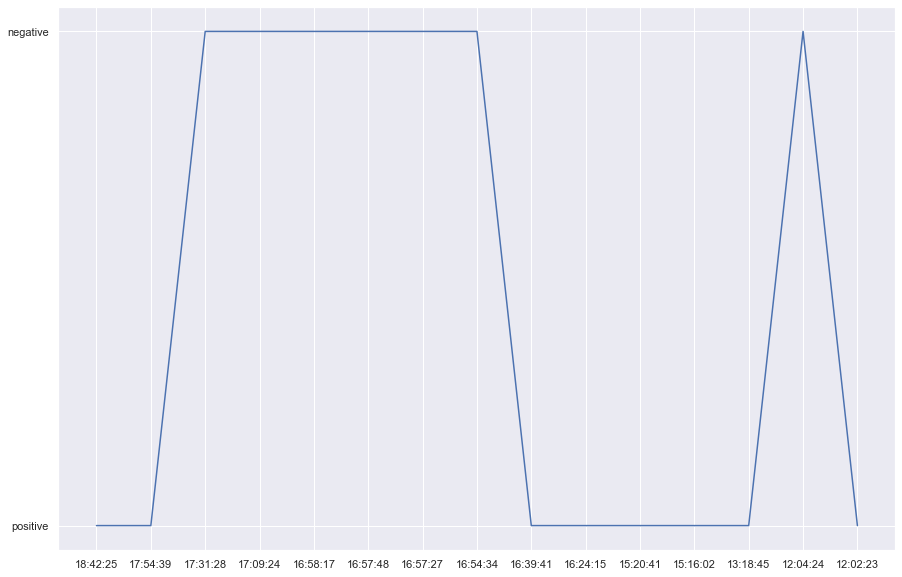

In [289]:
plt.plot(tweet_dataset['created_at'], tweet_dataset['sentiment'])

# End of Assignment